## 10. Diverging Bars

- help to differentiate the performance of groups
- how the items are varying based on a single metric
hlines function

In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
#prepare data
df=pd.read_csv('https://github.com/selva86/datasets/raw/master/mtcars.csv')
x=df.loc[:,['mpg']]
#create a column that standarize the value
df['mpg_z']=(x-x.mean())/x.std()
df['colors']=['red'if x<0 else 'green' for x in df['mpg_z']]
df.sort_values('mpg_z',inplace=True)
df.reset_index(inplace=True)


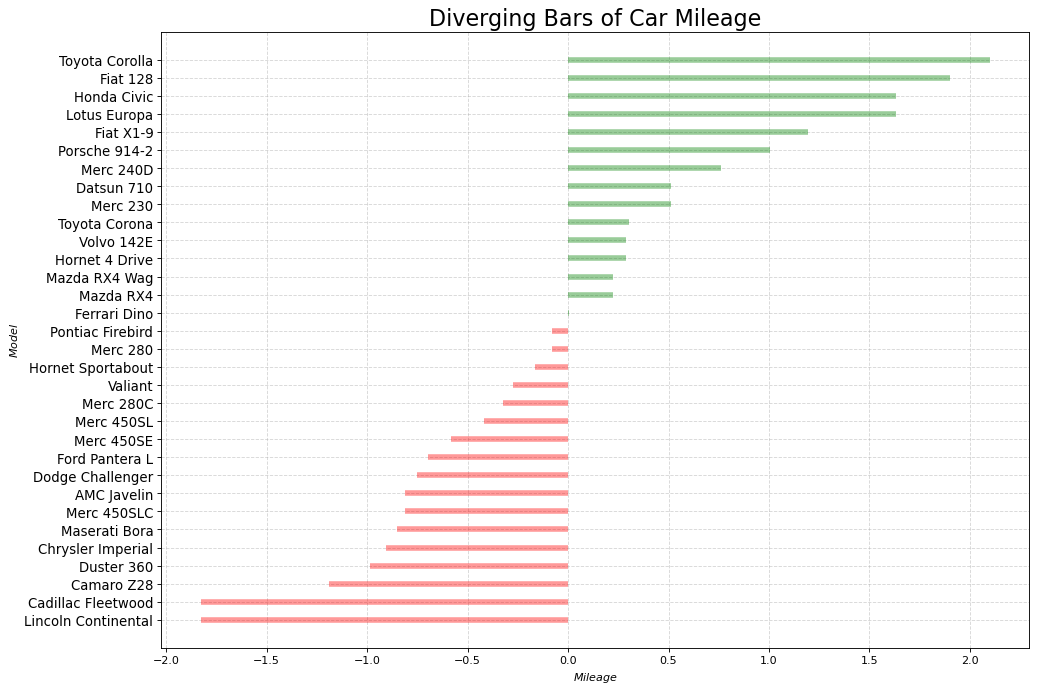

In [14]:
#draw the plot
plt.figure(figsize=(14,10),dpi=80)
plt.hlines(y=df.index,xmin=0,xmax=df.mpg_z,color=df.colors,alpha=0.4,linewidth=5)
# Decorations
plt.gca().set(ylabel='$Model$', xlabel='$Mileage$')
plt.yticks(df.index, df.cars, fontsize=12)
plt.title('Diverging Bars of Car Mileage', fontdict={'size':20})
plt.grid(linestyle='--', alpha=0.5)
plt.show()

## 11.Diverging texts

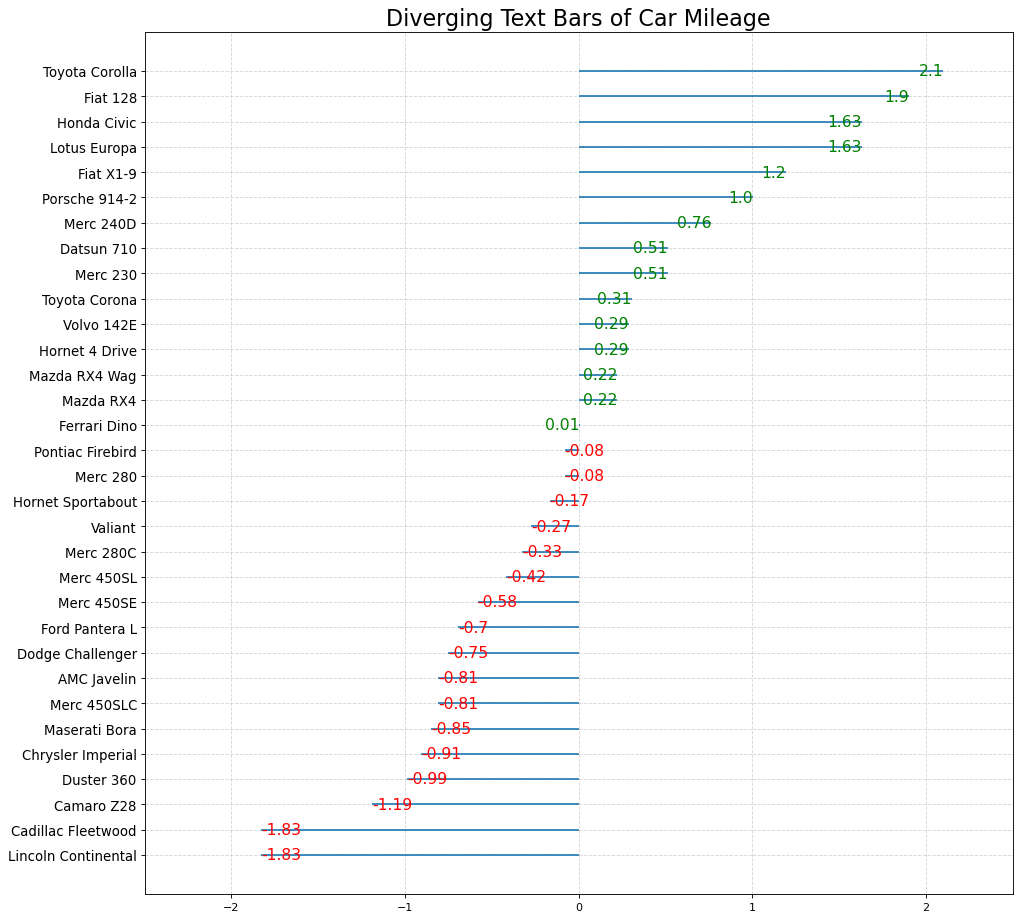

In [25]:
# Prepare Data
df = pd.read_csv("https://github.com/selva86/datasets/raw/master/mtcars.csv")
x = df.loc[:, ['mpg']]
df['mpg_z'] = (x - x.mean())/x.std()
df['colors'] = ['red' if x < 0 else 'green' for x in df['mpg_z']]
df.sort_values('mpg_z', inplace=True)
df.reset_index(inplace=True)


#draw plot
plt.figure(figsize=(14,14),dpi=80)
plt.hlines(y=df.index,xmin=0,xmax=df.mpg_z)
##add tex on the graph
for x,y,tex in zip(df.mpg_z,df.index,df.mpg_z):
    t=plt.text(x,y, round(tex,2),horizontalalignment='right' if x>0 else 'left',
              verticalalignment='center',fontdict={'color':'red'if x<0 else 'green','size':14})
# Decorations    
plt.yticks(df.index, df.cars, fontsize=12)
plt.title('Diverging Text Bars of Car Mileage', fontdict={'size':20})
plt.grid(linestyle='--', alpha=0.5)
plt.xlim(-2.5, 2.5)
plt.show()


## 12. Diverging Dot Plot

In [22]:
# Prepare Data
df = pd.read_csv("https://github.com/selva86/datasets/raw/master/mtcars.csv")
x = df.loc[:, ['mpg']]
df['mpg_z'] = (x - x.mean())/x.std()
df['colors'] = ['red' if x < 0 else 'darkgreen' for x in df['mpg_z']]
df.sort_values('mpg_z', inplace=True)
df.reset_index(inplace=True)

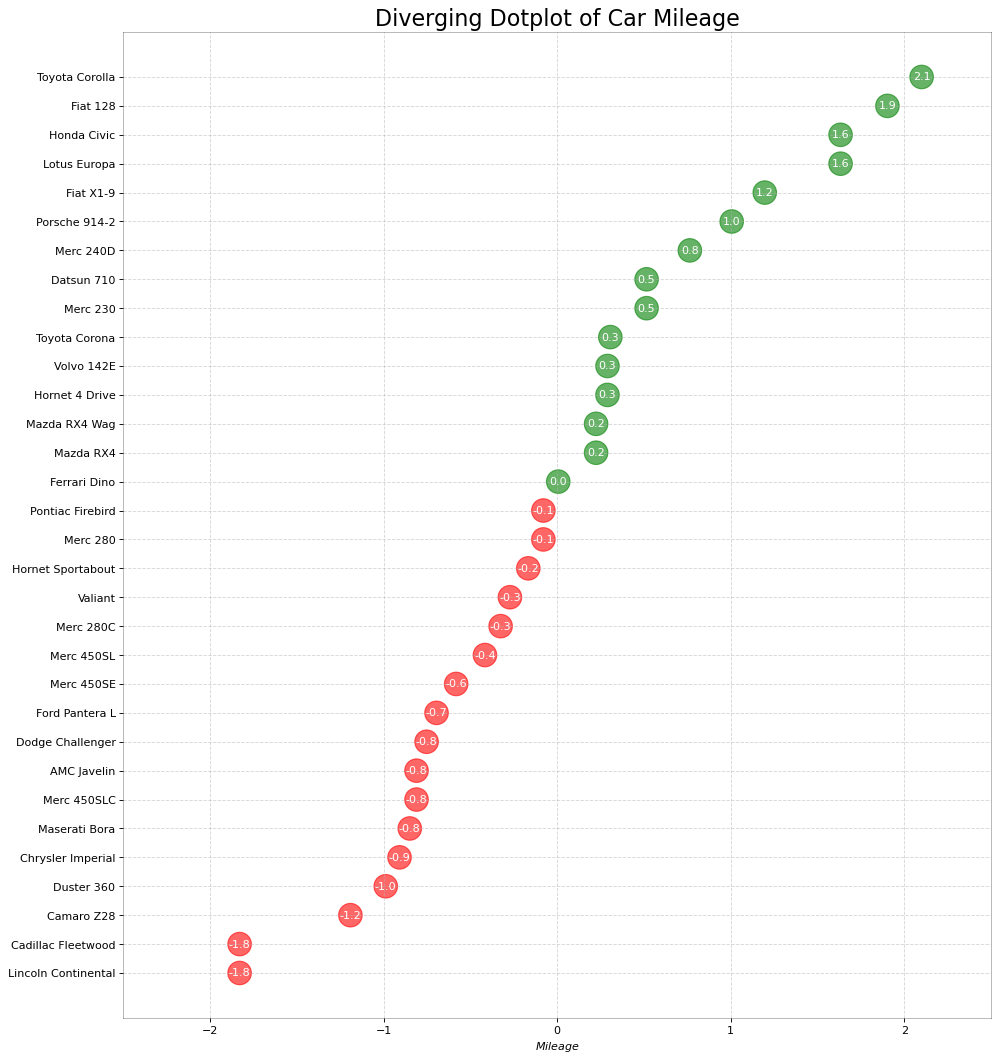

In [26]:
#graph
plt.figure(figsize=(14,16),dpi=80)
plt.scatter(df.mpg_z,df.index,s=450,c=df.colors,alpha=0.6)
for x,y,tex in zip(df.mpg_z,df.index,df.mpg_z):
    t=plt.text(x,y,round(tex,1),horizontalalignment='center', 
                 verticalalignment='center', fontdict={'color':'white'})
    
# Decorations
# Lighten borders
#gca get current axes
plt.gca().spines["top"].set_alpha(.3)
plt.gca().spines["bottom"].set_alpha(.3)
plt.gca().spines["right"].set_alpha(.3)
plt.gca().spines["left"].set_alpha(.3)


plt.yticks(df.index, df.cars)
plt.title('Diverging Dotplot of Car Mileage', fontdict={'size':20})
plt.xlabel('$Mileage$')
plt.grid(linestyle='--', alpha=0.5)
plt.xlim(-2.5, 2.5)
plt.show()    

## 13. Diverging Lollipop charts with markers

In [30]:
# Prepare Data
df = pd.read_csv("https://github.com/selva86/datasets/raw/master/mtcars.csv")
x = df.loc[:, ['mpg']]
df['mpg_z'] = (x - x.mean())/x.std()
df['colors'] = 'black'

In [33]:
# color fiat differently
df.loc[df.cars=='Fiat X1-9','colors']='darkorange'
df.sort_values('mpg_z',inplace=True)
df.reset_index(inplace=True)

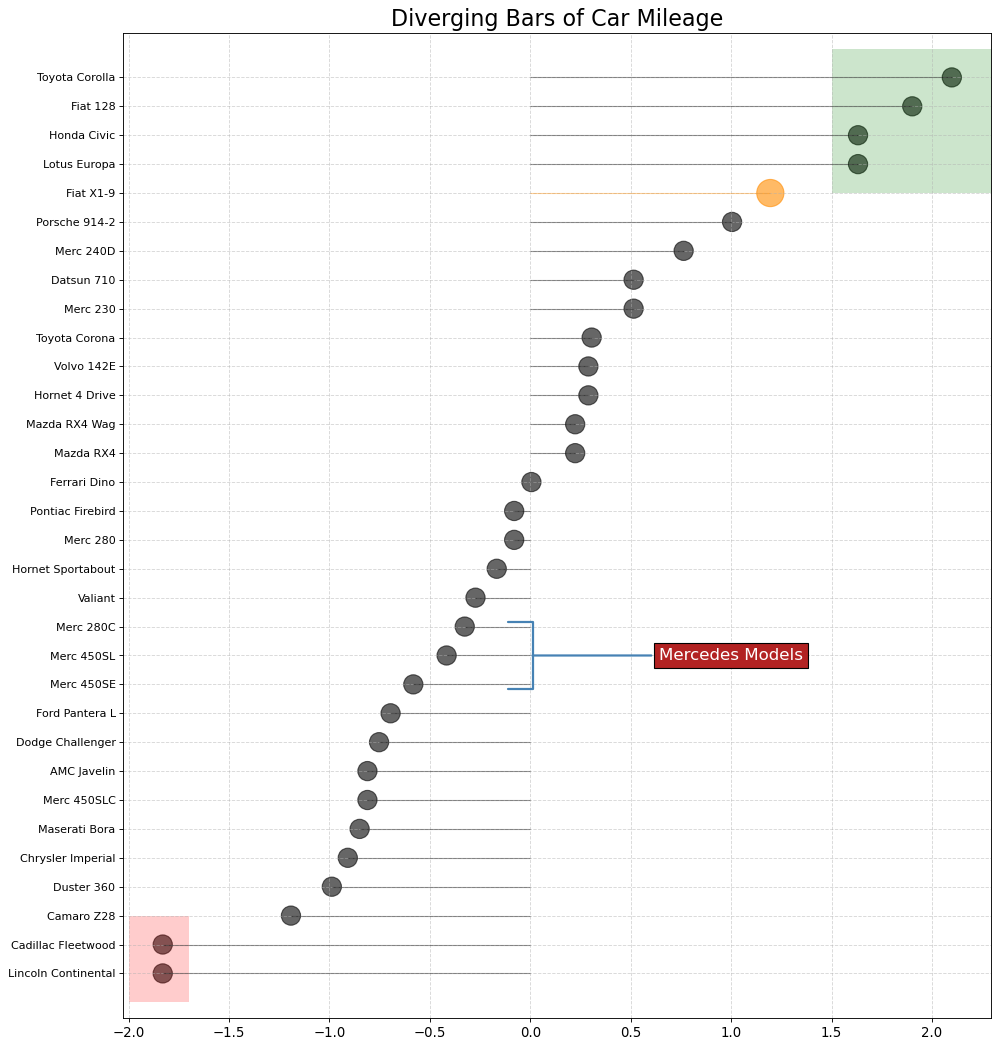

In [36]:
#Draw plot
import matplotlib.patches as patches
plt.figure(figsize=(14,16),dpi=80)
plt.hlines(y=df.index,xmin=0,xmax=df.mpg_z,color=df.colors,alpha=0.4,linewidth=1)
plt.scatter(df.mpg_z,df.index,s=[600 if x=='Fiat X1-9' else 300 for x in df.cars], color=df.colors,alpha=0.6)
plt.yticks(df.index, df.cars)
plt.xticks(fontsize=12)

#Annotate
plt.annotate('Mercedes Models',xy=(0.0,11.0),xytext=(1.0,11.0),xycoords='data',
            fontsize=15,ha='center',va='center',
            bbox=dict(boxstyle='square',fc='firebrick'),
            arrowprops=dict(arrowstyle='-[,widthB=2.0,lengthB=1.5',lw=2.0,color='steelblue'),color='white')


# Add Patches
p1 = patches.Rectangle((-2.0, -1), width=.3, height=3, alpha=.2, facecolor='red')
p2 = patches.Rectangle((1.5, 27), width=.8, height=5, alpha=.2, facecolor='green')
plt.gca().add_patch(p1)
plt.gca().add_patch(p2)

# Decorate
plt.title('Diverging Bars of Car Mileage', fontdict={'size':20})
plt.grid(linestyle='--', alpha=0.5)
plt.show()




## 14. Area Chart

In [50]:
#prepare data
df=pd.read_csv("https://github.com/selva86/datasets/raw/master/economics.csv", parse_dates=['date']).head(100)
x=np.arange(df.shape[0])
##calculate the monthly returns
y_returns=(df.psavert.diff().fillna(0)/df.psavert.shift(1)).fillna(0)*100

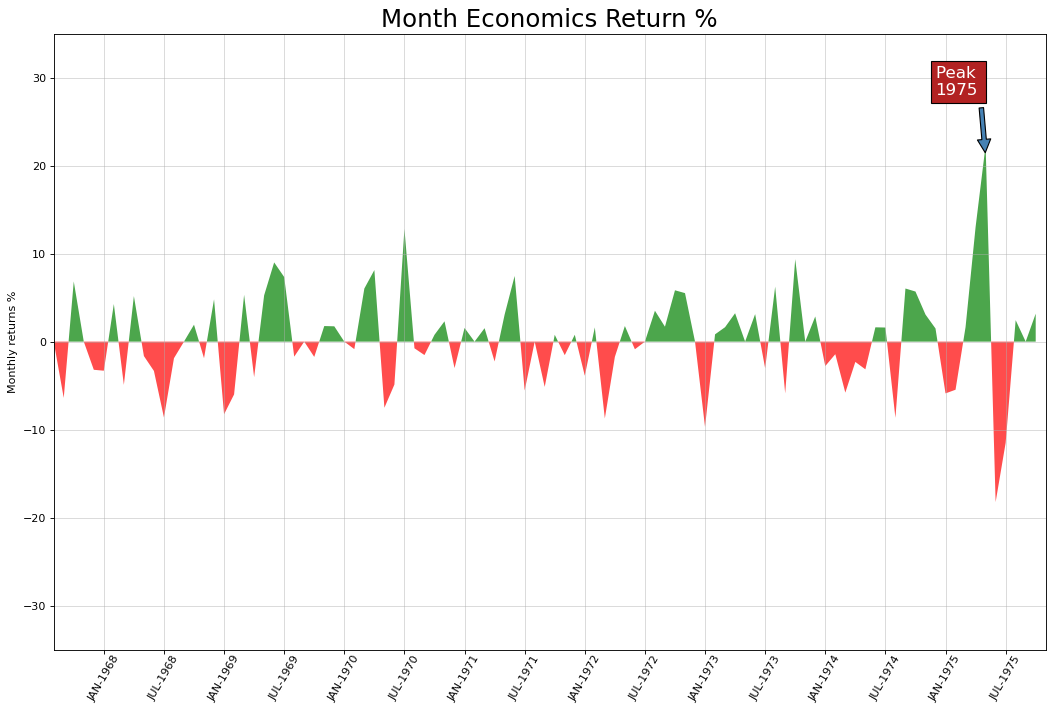

In [71]:
#plot
plt.figure(figsize=(16,10),dpi=80)
plt.fill_between(x[1:],y_returns[1:],0,where=y_returns[1:]>=0,facecolor='green',interpolate=True,alpha=0.7)
plt.fill_between(x[1:],y_returns[1:],0,where=y_returns[1:]<=0,facecolor='red',interpolate=True,alpha=0.7)

#Annotate
##xy 是小箭头所指的点
plt.annotate('Peak \n1975',xy=(94.0,21.0),xytext=(89,28),
            bbox=dict(boxstyle='square',fc='firebrick'),
            arrowprops=dict(facecolor='steelblue',shrink=0.07),fontsize=15,color='white')

# Decorations
xtickvals = [str(m)[:3].upper()+"-"+str(y) for y,m in zip(df.date.dt.year, df.date.dt.month_name())]
plt.gca().set_xticks(x[::6])
plt.gca().set_xticklabels(xtickvals[::6], rotation=60, fontdict={'horizontalalignment': 'center', 'verticalalignment': 'center_baseline'})
plt.ylim(-35,35)
plt.xlim(1,100)
plt.title("Month Economics Return %", fontsize=22)
plt.ylabel('Monthly returns %')
plt.grid(alpha=0.5)
plt.show()


